# FACE RECOGNITION EXPERIMENTS

http://dlib.net/face_recognition.py.html

In [1]:
import dlib
import imageio
import joblib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_2D_landmarks(image, landmarks):
    frame = np.array(image)
    if frame.max() <= 1.:
        max_value = 1
    else:
        max_value = 255
    face_width = landmarks[:, 0].max() - landmarks[:, 0].min()
    lm_width = np.ceil(face_width / 60)
    for l, landmark in enumerate(landmarks):
        frame[int(landmark[1]-lm_width):int(landmark[1]+lm_width), int(landmark[0]-lm_width):int(landmark[0]+lm_width)] = max_value
    plt.imshow(frame)
    
def shape_to_landmarks(shape):
    return np.round([[shape.part(i).x, shape.part(i).y] for i in range(68)]).astype('int')

def expand_rect(rect, scale=None, scale_w=1.5, scale_h=1.5, frame_shape=(256, 256)):
    if scale is not None:
        scale_w = scale
        scale_h = scale
    # Rect: (x, y, x+w, y+h)
    x = rect[0]
    y = rect[1]
    w = rect[2] - x
    h = rect[3] - y
    # new_w, new_h
    new_w = int(w * scale_w)
    new_h = int(h * scale_h)
    # new_x
    new_x = int(x - (new_w - w)/2)
    if new_x < 0:
        new_w = new_x + new_w
        new_x = 0
    elif new_x + new_w > (frame_shape[1] - 1):
        new_w = (frame_shape[1] - 1) - new_x
    # new_y
    new_y = int(y - (new_h - h)/2)
    if new_y < 0:
        new_h = new_y + new_h
        new_y = 0
    elif new_y + new_h > (frame_shape[0] - 1):
        new_h = (frame_shape[0] - 1) - new_y
    # Return
    return [new_x, new_y, new_x + new_w, new_y + new_h]


# 1. Import dlib face detector, shape predictor, face recognition model

In [3]:
shape_predictor_68_path = '/shared/fusor/home/voleti.vikram/shape_predictor_68_face_landmarks.dat'
# shape_predictor5_path = '/shared/fusor/home/voleti.vikram/shape_predictor_5_face_landmarks.dat'
face_rec_model_path = '/shared/fusor/home/voleti.vikram/dlib_face_recognition_resnet_model_v1.dat'

In [4]:
dlib_detector = dlib.get_frontal_face_detector()
dlib_68_predictor = dlib.shape_predictor(shape_predictor_68_path)
# dlib_5_predictor = dlib.shape_predictor(shape_predictor5_path)
dlib_facerec = dlib.face_recognition_model_v1(face_rec_model_path)

# 2. Read images of Andrew Ng and others

/users/voleti.vikram/miniconda3/lib/python3.6/site-packages/imageio/core/format.py:403: UserWarning: Could not read last frame of /shared/fusor/home/voleti.vikram/ANDREW_NG/videos/01_small.mp4.
  warn('Could not read last frame of %s.' % uri)


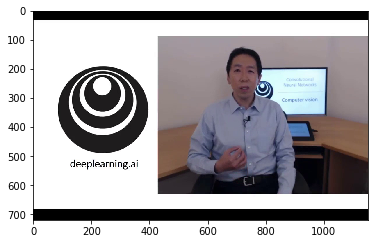

In [5]:
video1 = '/shared/fusor/home/voleti.vikram/ANDREW_NG/videos/01_small.mp4'
vid = imageio.get_reader(video1)
for frame in vid:
    pass

plt.imshow(frame)
image1 = np.array(frame)

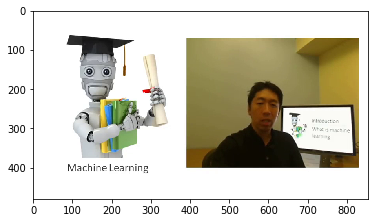

In [6]:
video2 = '/shared/fusor/home/voleti.vikram/ANDREW_NG/pilot/Andrew_Ng.mp4'
vid = imageio.get_reader(video2)
for f, frame in enumerate(vid):
    if f == 100:
        break

plt.imshow(frame)
image2 = np.array(frame)

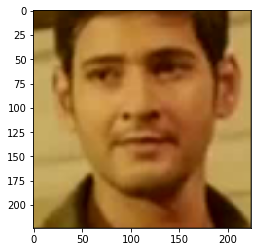

In [7]:
image3 = imageio.imread('/shared/fusor/home/voleti.vikram/MOVIE_TRANSLATION/frames/telugu/Mahesh_Babu/Mahesh_Babu_0000/Mahesh_Babu_0000_frame_000.png')
plt.imshow(image3)

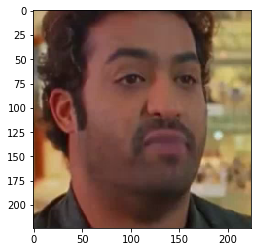

In [8]:
image4 = imageio.imread('/shared/fusor/home/voleti.vikram/MOVIE_TRANSLATION/frames/telugu/Junior_NTR/Junior_NTR_0089/Junior_NTR_0089_frame_000.png')
plt.imshow(image4)

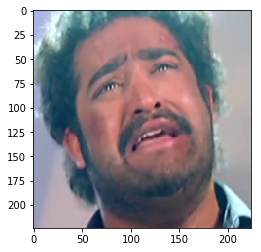

In [9]:
image5 = imageio.imread('/shared/fusor/home/voleti.vikram/MOVIE_TRANSLATION/frames/telugu/Junior_NTR/Junior_NTR_0022/Junior_NTR_0022_frame_000.png')
plt.imshow(image5)

# 3. Make face features using dlib face recognition model

In [10]:
faces_list = []
face_descriptors_list = []

## image1 - Andrew Ng

In [11]:
# # Detect faces in image1
# img = image1

# dets = dlib_detector(img, 1)
# print("Number of faces detected: {}".format(len(dets)))

# # Now process each face we found.
# face_shapes = []
# face_descriptors = []
# for k, d in enumerate(dets):
#     print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
#         k, d.left(), d.top(), d.right(), d.bottom()))
#     # Get the landmarks/parts for the face in box d.
#     shape = dlib_68_predictor(img, d)
#     face_shapes.append(shape)
    
#     # Make face descriptor
#     face_descriptors.append(np.array(dlib_facerec.compute_face_descriptor(img, shape)))

# # Save
# joblib.dump([face_shapes, face_descriptors], '/shared/fusor/home/voleti.vikram/movie-translation-experiments/face_recognition/image1.pkl')

a = joblib.load('/shared/fusor/home/voleti.vikram/movie-translation-experiments/face_recognition/image1.pkl')
face_shapes_image1 = a[0]
face_descriptors_image1 = a[1]

### Note face & face descriptors, and plot landmarks

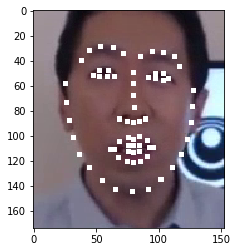

In [12]:
# plt.figure(figsize=(15, 15))
for i, (shape, descriptor) in enumerate(zip(face_shapes_image1, face_descriptors_image1)):
    lm = shape_to_landmarks(shape)
    lm_min_col, lm_max_col, lm_min_row, lm_max_row = int(lm[:, 0].min()), int(lm[:, 0].max()), int(lm[:, 1].min()), int(lm[:, 1].max())
    face_rect = expand_rect([lm_min_col, lm_min_row, lm_max_col, lm_max_row], scale=1.5, frame_shape=image1.shape)
    face = image1[face_rect[1]:face_rect[3], face_rect[0]:face_rect[2]]
    lm_face = lm - [face_rect[0], face_rect[1]]
    plt.subplot(1, len(face_shapes_image1), i+1)
    plot_2D_landmarks(face, lm_face)
    faces_list.append(face)
    face_descriptors_list.append(descriptor)

In [13]:
def note_face_descriptor_plot_lm(image, face_shapes_image, face_descriptors_image, faces_list, face_descriptors_list):
    # plt.figure(figsize=(15, 15))
    for i, (shape, descriptor) in enumerate(zip(face_shapes_image, face_descriptors_image)):
        lm = shape_to_landmarks(shape)
        lm_min_col, lm_max_col, lm_min_row, lm_max_row = int(lm[:, 0].min()), int(lm[:, 0].max()), int(lm[:, 1].min()), int(lm[:, 1].max())
        face_rect = expand_rect([lm_min_col, lm_min_row, lm_max_col, lm_max_row], scale=1.5, frame_shape=image.shape)
        face = image[face_rect[1]:face_rect[3], face_rect[0]:face_rect[2]]
        lm_face = lm - [face_rect[0], face_rect[1]]
        plt.subplot(1, len(face_shapes_image), i+1)
        plot_2D_landmarks(face, lm_face)
        faces_list.append(face)
        face_descriptors_list.append(descriptor)
    return faces_list, face_descriptors_list

## image2 - Andrew Ng and the machine

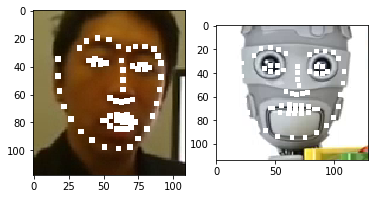

In [14]:
a = joblib.load('/shared/fusor/home/voleti.vikram/movie-translation-experiments/face_recognition/image2.pkl')
face_shapes_image2 = a[0]
face_descriptors_image2 = a[1]

# Note face and plot landmarks
faces_list, face_descriptors_list = note_face_descriptor_plot_lm(image2, face_shapes_image2, face_descriptors_image2,
                                                                 faces_list, face_descriptors_list)

## image3 - Mahesh Babu

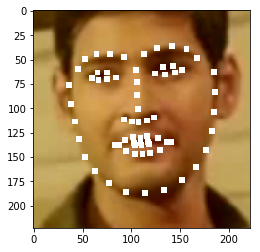

In [15]:
a = joblib.load('/shared/fusor/home/voleti.vikram/movie-translation-experiments/face_recognition/image3.pkl')
face_shapes_image3 = a[0]
face_descriptors_image3 = a[1]

# Note face and plot landmarks
faces_list, face_descriptors_list = note_face_descriptor_plot_lm(image3, face_shapes_image3, face_descriptors_image3,
                                                                 faces_list, face_descriptors_list)

## image4 - Junior NTR

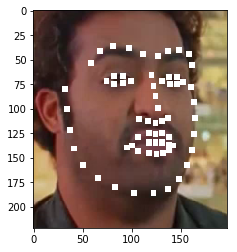

In [16]:
a = joblib.load('/shared/fusor/home/voleti.vikram/movie-translation-experiments/face_recognition/image4.pkl')
face_shapes_image4 = a[0]
face_descriptors_image4 = a[1]

# Note face and plot landmarks
faces_list, face_descriptors_list = note_face_descriptor_plot_lm(image4, face_shapes_image4, face_descriptors_image4,
                                                                 faces_list, face_descriptors_list)

## image5 - Junior NTR

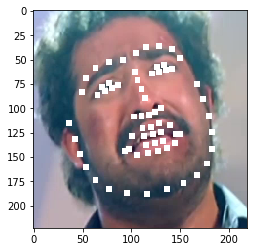

In [17]:
a = joblib.load('/shared/fusor/home/voleti.vikram/movie-translation-experiments/face_recognition/image5.pkl')
face_shapes_image5 = a[0]
face_descriptors_image5 = a[1]

# Note face and plot landmarks
faces_list, face_descriptors_list = note_face_descriptor_plot_lm(image5, face_shapes_image5, face_descriptors_image5,
                                                                 faces_list, face_descriptors_list)

In [18]:
len(faces_list), len(face_descriptors_list)

(6, 6)

# 4. Compare distances between face descriptors

In [19]:
def euc_dist(a, b):
    return np.linalg.norm(a - b)

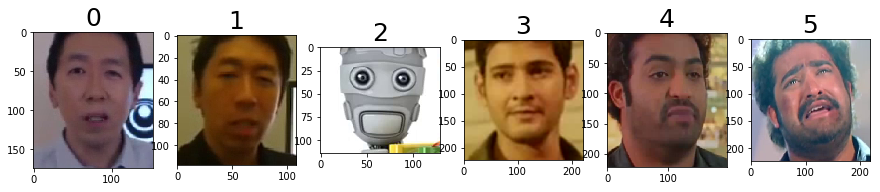

In [20]:
plt.figure(figsize=(15, 15))
for i, face in enumerate(faces_list):
    plt.subplot(1, len(faces_list), i+1)
    plt.imshow(face)
    plt.title(str(i), fontsize=25)

In [32]:
imageio.imwrite('/shared/fusor/home/voleti.vikram/ANDREW_NG/andrew_ng.png', faces_list[1])

In [21]:
face_dists = np.zeros((len(faces_list), len(faces_list)))
for i in range(len(faces_list)):
    for j in range(len(faces_list)):
        face_dists[i, j] = euc_dist(face_descriptors_list[i], face_descriptors_list[j])

## Confusion matrix of face distances

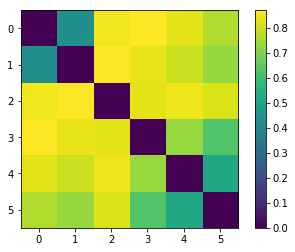

In [22]:
plt.imshow(face_dists)
plt.colorbar()

## Threshold = 0.6

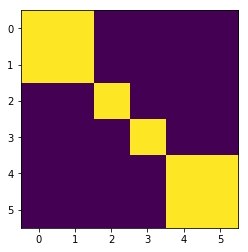

In [23]:
plt.imshow(face_dists < .6)

# CONCLUSION

Thus, dlib face recognition model recognizes faces below 0.6 distance as the same face!